In [13]:
import pandas as pd

In [14]:
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


In [15]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   name    49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


> fruits는 35개의 사과와 14개의 딸기 데이터로 구성되어 있음

In [16]:
# 사과 정보 불러오기
apple = fruits[fruits["name"] == "apple"]
apple.tail()

,length,weight,name
30,38.5,920.0,apple
31,38.5,955.0,apple
32,39.5,925.0,apple
33,41.0,975.0,apple
34,41.0,950.0,apple


In [17]:
# appl에 대한 산포도 그리기
import matplotlib.pyplot as plt

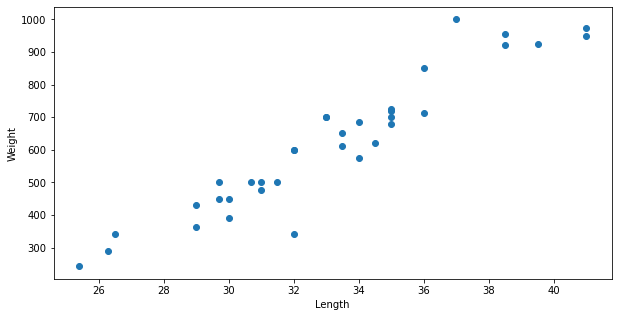

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(apple.length, apple.weight)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

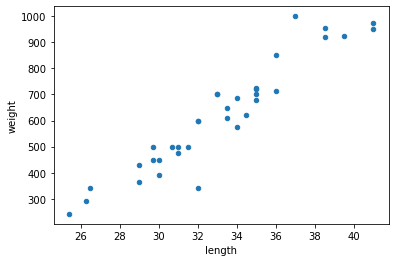

In [19]:
apple.drop("name", axis=1).plot(
  kind = "scatter",
  x = "length",
  y = "weight"
)
plt.show()

In [21]:
# 딸기에 대한 산포도 그리기
berry = fruits[fruits["name"] == "berry"]
berry.reset_index(drop=True, inplace=True)
berry.tail()

,length,weight,name
9,12.2,12.2,berry
10,12.4,13.4,berry
11,13.0,12.2,berry
12,14.3,19.7,berry
13,15.0,19.9,berry


In [22]:
berry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  14 non-null     float64
 1   weight  14 non-null     float64
 2   name    14 non-null     object 
dtypes: float64(2), object(1)
memory usage: 464.0+ bytes


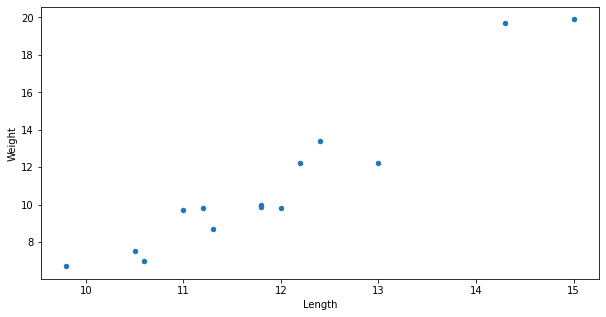

In [26]:
berry.drop("name",axis=1).plot(
  kind = "scatter",
  figsize = (10,5),
  x= "length",
  y = "weight",
  xlabel = "Length",
  ylabel = "Weight"
)
plt.show()

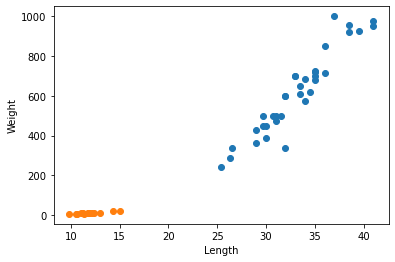

In [28]:
# 2개의 DataSet을 산포도로 한꺼번에 비교하기
plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

---
# 머신러닝을 위한 데이터 준비
### Feature Data와 Target Data의 분리

In [31]:
# Feature Data

fruitsData = fruits.drop("name", axis=1)
fruitsData.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [32]:
# Target Data

fruitsTarget = fruits.name
fruitsTarget.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

---
# 최근접 이웃(KNN : K Nearest Neighbors) 분류 알고리즘 사용
: 최근접 이웃 분류 알고리즘은 지도학습이다

![](../Data/knn_01.png)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
kn = KNeighborsClassifier() # n_neighbors = 5(default) / 보통은 홀수로 입력 <--- Hyper Parameter

In [35]:
# 학습시키기
kn.fit(fruitsData, fruitsTarget)

KNeighborsClassifier()

In [41]:
# 정확도 확인하기
kn.score(fruitsData, fruitsTarget)

1.0

> 문제와 답을 다 알려주고 정확성을 확인했더니 바로 100점이 나왔다

### 예측해보기
길이가 30cm이고 무게가 600g인 과일은 무엇일까요?

In [45]:
kn.predict([[30, 600]])

array(['apple'], dtype=object)

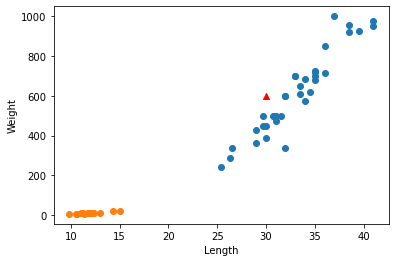

In [49]:
# 산포도로 예측 범위 확인하기
plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)
plt.scatter(30, 600, marker="^", c="red")

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

> 데이터의 범위가 잘 구분되어 있으면 KNN을 사용하기 좋다